In [1]:
import os
import hail as hl
import pyspark
import bokeh
import logging
import random
import pandas as pd
import numpy as np
from scipy import stats
import pickle 
from matplotlib import pyplot as plt
from typing import Any, Counter, List, Optional, Tuple, Union
from hail.plot import show, output_notebook
tmp_dir = "hdfs://spark-master:9820/"
sc = pyspark.SparkContext()
temp_dir = working_dir = os.path.join(os.environ["HAIL_HOME"], "tmp")
hadoop_config = sc._jsc.hadoopConfiguration()
hadoop_config.set("fs.s3a.access.key", "8YY584J59H7Q6AVKHSU8")
hadoop_config.set("fs.s3a.secret.key", "P8vePa7JUvxKXX2me9ti1cGujgYWMoimAwx4mMlM")
hadoop_config.set("fs.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystem")
hadoop_config.set("fs.AbstractFileSystem.gs.impl", "com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS")
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference='GRCh38')
output_notebook()
logging.basicConfig(format="%(levelname)s (%(name)s %(lineno)s): %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

/opt/sanger.ac.uk/hgi/anaconda3/lib/python3.7/site-packages/hail/context.py:71: UserWarning: pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jar
  'pip-installed Hail requires additional configuration options in Spark referring\n'
Running on Apache Spark version 2.4.3
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.31-6060f9c971cc
LOGGING: writing to /opt/sanger.ac.uk/hgi/hail/tmp/scripts/sanger_gnomad_hail_qc/notebooks/hail-20200825-0942-0.2.31-6060f9c971cc.log


Loading BokehJS ...

In [3]:
mt = hl.read_matrix_table(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_superpops_sampleqc.mt")
ht_pops=hl.read_table(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_QC_filters.ht")
ht_superpops=hl.read_table(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_superpops_QC_filters.ht")
                      

In [3]:
ht_pops.show()

s,fail_sample_qc.heterozygosity_rate,fail_sample_qc.n_snp,fail_sample_qc.r_ti_tv,fail_sample_qc.r_insertion_deletion,fail_sampleqc.n_insertion,fail_sampleqc.n_deletion,fail_sample_qc.r_het_hom_var,qc_metrics_filters
str,bool,bool,bool,bool,bool,bool,bool,set<str>
"""EGAN00001006259""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006260""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006261""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006263""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006264""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006265""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006266""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006267""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006268""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"


In [4]:
ht_superpops.show()

s,fail_sample_qc.heterozygosity_rate,fail_sample_qc.n_snp,fail_sample_qc.r_ti_tv,fail_sample_qc.r_insertion_deletion,fail_sampleqc.n_insertion,fail_sampleqc.n_deletion,fail_sample_qc.r_het_hom_var,qc_metrics_filters
str,bool,bool,bool,bool,bool,bool,bool,set<str>
"""EGAN00001006259""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006260""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006261""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006263""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006264""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006265""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006266""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006267""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"
"""EGAN00001006268""",false,false,false,NA,true,true,false,"{""sampleqc.n_deletion"",""sampleqc.n_insertion""}"


In [6]:
ht_pops.describe()

----------------------------------------
Global fields:
    'qc_metrics_stats': dict<tuple (
        str
    ), struct {
        `sample_qc.heterozygosity_rate`: struct {
            median: float32, 
            mad: float64, 
            lower: float64, 
            upper: float64
        }, 
        `sample_qc.n_snp`: struct {
            median: int64, 
            mad: float64, 
            lower: float64, 
            upper: float64
        }, 
        `sample_qc.r_ti_tv`: struct {
            median: float64, 
            mad: float64, 
            lower: float64, 
            upper: float64
        }, 
        `sample_qc.r_insertion_deletion`: struct {
            median: float64, 
            mad: float64, 
            lower: float64, 
            upper: float64
        }, 
        `sampleqc.n_insertion`: struct {
            median: int64, 
            mad: float64, 
            lower: float64, 
            upper: float64
        }, 
        `sampleqc.n_deletion`: struct {
  

In [39]:
ht_pops=ht_pops.annotate(pop=mt.cols()[ht_pops.s].assigned_pop)
ht_pops=ht_pops.annotate(cohort=mt.cols()[ht_pops.s].cohort)

ht_superpops=ht_superpops.annotate(superpop=mt.cols()[ht_superpops.s].assigned_superpop)
ht_superpops=ht_superpops.annotate(cohort=mt.cols()[ht_superpops.s].cohort)


In [40]:
ht_pops.write(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info.ht", overwrite=True)

2020-08-13 10:41:33 Hail: INFO: Coerced sorted dataset
2020-08-13 10:41:34 Hail: INFO: Coerced sorted dataset
2020-08-13 10:41:38 Hail: INFO: wrote table with 93674 rows in 2 partitions to /opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info.ht


In [41]:
ht_superpops=ht_superpops.checkpoint(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_superpops_QC_filters_with_superpops_info.ht", overwrite=True)

2020-08-13 10:41:47 Hail: INFO: Coerced sorted dataset
2020-08-13 10:41:49 Hail: INFO: Coerced sorted dataset
2020-08-13 10:41:52 Hail: INFO: wrote table with 93674 rows in 2 partitions to /opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_superpops_QC_filters_with_superpops_info.ht


In [6]:
ht_pops=hl.read_table(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info.ht")

In [8]:
ht_pops.flatten().export(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info_globals.ht")

2020-08-13 14:46:25 Hail: INFO: merging 1 files totalling 7.3K...
2020-08-13 14:46:25 Hail: INFO: while writing:
    /opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info_globals.ht
  merge time: 120.717ms


In [9]:
t1=hl.read_table( "/opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info_globals.ht")

FatalError: HailException: MatrixTable and Table files are directories; path '/opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info_globals.ht' is not a directory

Java stack trace:
is.hail.utils.HailException: MatrixTable and Table files are directories; path '/opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info_globals.ht' is not a directory
	at is.hail.utils.ErrorHandling$class.fatal(ErrorHandling.scala:9)
	at is.hail.utils.package$.fatal(package.scala:74)
	at is.hail.expr.ir.RelationalSpec$.readMetadata(AbstractMatrixTableSpec.scala:31)
	at is.hail.expr.ir.RelationalSpec$.readReferences(AbstractMatrixTableSpec.scala:62)
	at is.hail.variant.ReferenceGenome$.fromHailDataset(ReferenceGenome.scala:586)
	at is.hail.variant.ReferenceGenome.fromHailDataset(ReferenceGenome.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



Hail version: 0.2.31-6060f9c971cc
Error summary: HailException: MatrixTable and Table files are directories; path '/opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info_globals.ht' is not a directory

In [5]:
ht_popsdf=ht_pops.to_pandas()

KeyboardInterrupt: 

In [43]:
ht_pops.export(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info.tsv.bgz", delimiter="\t")

2020-08-13 10:42:00 Hail: INFO: merging 2 files totalling 611.7K...
2020-08-13 10:42:00 Hail: INFO: while writing:
    /opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info.tsv.bgz
  merge time: 11.895ms


In [44]:
ht_superpops.export(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_superpops_QC_filters_with_superpops_info.tsv.bgz", delimiter="\t")

2020-08-13 10:42:05 Hail: INFO: merging 2 files totalling 578.0K...
2020-08-13 10:42:05 Hail: INFO: while writing:
    /opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/filtering/mt_superpops_QC_filters_with_superpops_info.tsv.bgz
  merge time: 11.170ms


In [2]:
df_pops=pd.read_csv(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_pops_QC_filters_with_pops_info.tsv.bgz", compression="gzip",sep="\t")
df_superpops=pd.read_csv(f"{temp_dir}/ddd-elgh-ukbb/filtering/mt_superpops_QC_filters_with_superpops_info.tsv.bgz", compression="gzip", sep="\t")


/opt/sanger.ac.uk/hgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_pops.head()

,s,fail_sample_qc.heterozygosity_rate,fail_sample_qc.n_snp,fail_sample_qc.r_ti_tv,fail_sample_qc.r_insertion_deletion,fail_sampleqc.n_insertion,fail_sampleqc.n_deletion,fail_sample_qc.r_het_hom_var,qc_metrics_filters,pop,cohort
0,EGAN00001006259,False,False,False,NaN,True,True,False,"[""sampleqc.n_deletion"",""sampleqc.n_insertion""]",Pakistani,UK_10K_CHD
1,EGAN00001006260,False,False,False,NaN,True,True,False,"[""sampleqc.n_deletion"",""sampleqc.n_insertion""]",Pakistani,UK_10K_CHD
2,EGAN00001006261,False,False,False,NaN,True,True,False,"[""sampleqc.n_deletion"",""sampleqc.n_insertion""]",oth,UK_10K_CHD
3,EGAN00001006263,False,False,False,NaN,True,True,False,"[""sampleqc.n_deletion"",""sampleqc.n_insertion""]",Pakistani,UK_10K_CHD
4,EGAN00001006264,False,False,False,NaN,True,True,False,"[""sampleqc.n_deletion"",""sampleqc.n_insertion""]",Pakistani,UK_10K_CHD


In [3]:
df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts()

pop             fail_sample_qc.heterozygosity_rate
African         False                                   551
                True                                     18
Bangladeshi     False                                  2657
                True                                     30
British         False                                 73873
                True                                     90
Caribbean       False                                  1351
Chinese         False                                   478
                True                                      1
Indian          False                                   574
                True                                      1
Irish           False                                  1201
Pakistani       False                                  9509
                True                                     69
White European  False                                  1826
                True                             

In [ ]:
df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts()

<AxesSubplot:ylabel='pop,fail_sample_qc.heterozygosity_rate'>

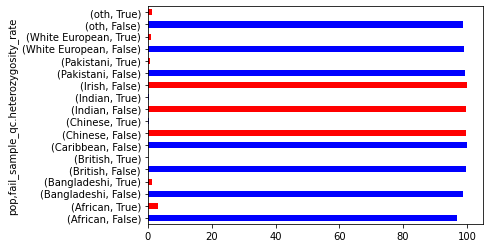

In [59]:
(df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts(normalize=True)*100).plot(kind = 'barh',color=['blue', 'red'])


In [5]:
df_pops.groupby("pop")["fail_sample_qc.r_het_hom_var"].value_counts()

pop             fail_sample_qc.r_het_hom_var
African         False                             544
                True                               25
Bangladeshi     False                            2674
                True                                9
British         False                           73880
                True                               82
Caribbean       False                            1350
                True                                1
Chinese         False                             478
                True                                1
Indian          False                             574
                True                                1
Irish           False                            1201
Pakistani       False                            9557
                True                               10
White European  False                            1836
                True                                5
oth             False                

In [11]:
df_superpops.groupby("superpop")["fail_sample_qc.heterozygosity_rate"].value_counts()

superpop  fail_sample_qc.heterozygosity_rate
AFR       False                                   684
AMR       False                                  1132
EUR       False                                 77199
          True                                    109
SAS       False                                 14146
          True                                    109
oth       False                                   285
          True                                     10
Name: fail_sample_qc.heterozygosity_rate, dtype: int64

In [13]:
df_superpops.groupby("superpop")["fail_sample_qc.r_het_hom_var"].value_counts()

superpop  fail_sample_qc.r_het_hom_var
AFR       False                             679
          True                                5
AMR       False                            1128
          True                                4
EUR       False                           77214
          True                               93
SAS       False                           14225
          True                               15
oth       False                             294
          True                                1
Name: fail_sample_qc.r_het_hom_var, dtype: int64

# import seaborn as sns
a4_dims = (16.69,8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=70)
ping=sns.barplot(x=(df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts()).index, y=df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts())
for p in ping.patches:
    ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

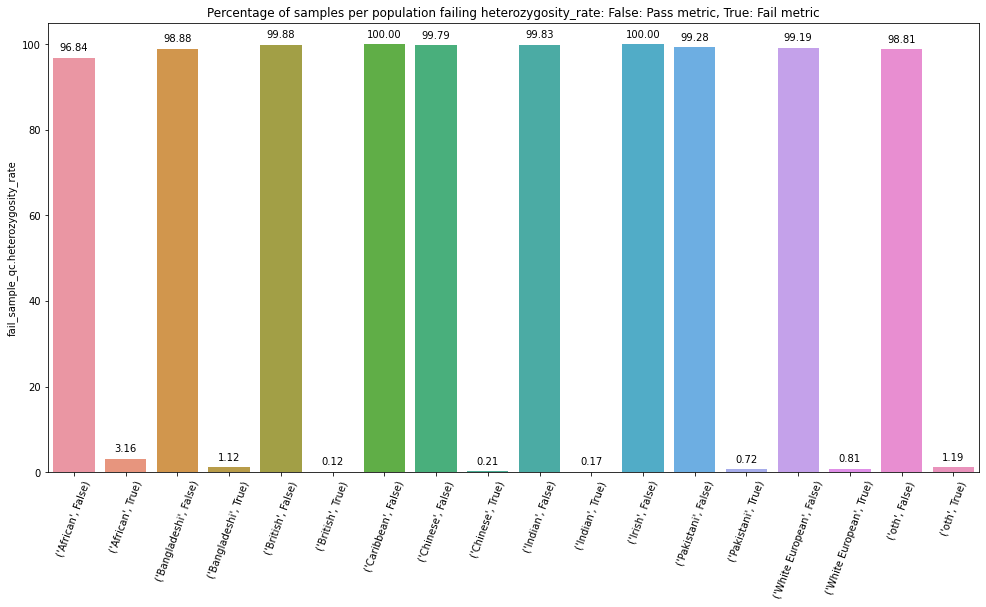

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns
a4_dims = (16.69,8.27)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=70)
ping=sns.barplot(x=(df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts(normalize=True)*100).index, y=df_pops.groupby("pop")["fail_sample_qc.heterozygosity_rate"].value_counts(normalize=True)*100)

for p in ping.patches:
    ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ping.set(title = 'Percentage of samples per population failing heterozygosity_rate: False: Pass metric, True: Fail metric' )
ping.savefig("output.png")


In [47]:
df_superpops.groupby("cohort")["fail_sample_qc.heterozygosity_rate"].value_counts()

cohort            fail_sample_qc.heterozygosity_rate
BiB_part1         False                                  2294
                  True                                     17
BiB_part2         False                                   470
                  True                                      3
Birmingham_part1  False                                  1057
                  True                                      4
Birmingham_part2  False                                   433
                  True                                     11
DDD               False                                 32244
                  True                                     94
ELGH_part1        False                                  1645
                  True                                      7
ELGH_part3        False                                  1058
                  True                                     30
ELGH_part4        False                                  1062
                 

In [ ]:
for column in df_pops.columns():
    a4_dims = (16.69,8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.xticks(rotation=70)
    ping=sns.barplot(x=(df_pops.groupby("pop")[column].value_counts(normalize=True)*100).index, y=df_pops.groupby("pop")[column].value_counts(normalize=True)*100)
    for p in ping.patches:
        ping.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    ping.set(title = f'Percentage of samples per population passing {column}: False: Pass metric, True: Fail metric', )

In [30]:
df_pops.groupby("pop")["fail_sampleqc.n_deletion"].count()

pop
African             569
Bangladeshi        2687
British           73963
Caribbean          1351
Chinese             479
Indian              575
Irish              1201
Pakistani          9578
White European     1841
oth                1430
Name: fail_sampleqc.n_deletion, dtype: int64

In [8]:
mt=mt.annotate_cols(assigned_pop=pca_scores[mt.s].pop)
mt=mt.annotate_cols(pca_scores=pca_scores[mt.s].pca_scores)
mt=mt.annotate_cols(heterozygosity_rate=mt.sample_qc.n_het/mt.sample_qc.n_called)
mt = mt.checkpoint(f"{tmp_dir}/ddd-elgh-ukbb/Sanger_cohort_AKT_elgh_labels_sampleqc_populations.mt", overwrite=True)

2020-08-04 13:41:15 Hail: INFO: wrote matrix table with 988 rows and 93674 columns in 21200 partitions to hdfs://spark-master:9820//ddd-elgh-ukbb/Sanger_cohort_AKT_elgh_labels_sampleqc_populations.mt


In [10]:
mt =hl.read_matrix_table(f"{temp_dir}/ddd-elgh-ukbb/Sanger_cohort_AKT_elgh_labels_sampleqc_populations.mt")

In [14]:
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
    'cohort': str
    'f_stat': float64
    'is_female': bool
    'sex': str
    'data_type': str
    'known_pop': str
    'gVCF': str
    'sample_qc': struct {
        dp_stats: struct {
            mean: float64, 
            stdev: float64, 
            min: float64, 
            max: float64
        }, 
        gq_stats: struct {
            mean: float64, 
            stdev: float64, 
            min: float64, 
            max: float64
        }, 
        call_rate: float64, 
        n_called: int64, 
        n_not_called: int64, 
        n_filtered: int64, 
        n_hom_ref: int64, 
        n_het: int64, 
        n_hom_var: int64, 
        n_non_ref: int64, 
        n_singleton: int64, 
        n_snp: int64, 
        n_insertion: int64, 
        n_deletion: int64, 
        n_transition: int64, 
        n_transversion: int64, 
        n_star: int64

In [3]:
mt_elgh=mt.filter_cols(mt.cohort=="ELGH_part1")

In [15]:
mt_cols=mt.cols()
mt_cols.select(mt_cols.cohort,mt_cols.known_pop, mt_cols.assigned_pop, mt_cols.heterozygosity_rate, mt_cols.pca_scores, mt_cols.sample_qc).flatten().export(f"{temp_dir}/ddd-elgh-ukbb/Sanger_cohorts_chr1-20-XY_populations_sampleqc.tsv.bgz", header=True)

2020-08-04 15:22:43 Hail: INFO: Coerced sorted dataset
2020-08-04 15:22:50 Hail: INFO: merging 2 files totalling 14.4M...
2020-08-04 15:22:50 Hail: INFO: while writing:
    /opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/Sanger_cohorts_chr1-20-XY_populations_sampleqc.tsv.bgz
  merge time: 68.182ms


In [16]:
df=pd.read_csv("/opt/sanger.ac.uk/hgi/hail/tmp/ddd-elgh-ukbb/Sanger_cohorts_chr1-20-XY_populations_sampleqc.tsv.bgz", compression="gzip", sep="\t")

/opt/sanger.ac.uk/hgi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df.head()

,s,cohort,known_pop,assigned_pop,heterozygosity_rate,pca_scores,sample_qc.dp_stats.mean,sample_qc.dp_stats.stdev,sample_qc.dp_stats.min,sample_qc.dp_stats.max,...,sample_qc.n_singleton,sample_qc.n_snp,sample_qc.n_insertion,sample_qc.n_deletion,sample_qc.n_transition,sample_qc.n_transversion,sample_qc.n_star,sample_qc.r_ti_tv,sample_qc.r_het_hom_var,sample_qc.r_insertion_deletion
0,EGAN00001006259,UK_10K_CHD,NaN,Pakistani,0.293522,"[0.26055383937107507,-0.061895365107862386,0.0...",64.103,66.453,2.0,746.0,...,0,652,0,0,502,150,0,3.3467,1.6022,NaN
1,EGAN00001006260,UK_10K_CHD,NaN,Pakistani,0.310729,"[0.2556622383832145,-0.05808822651732406,0.012...",69.463,71.017,4.0,544.0,...,0,653,0,0,510,143,0,3.5664,1.7746,NaN
2,EGAN00001006261,UK_10K_CHD,NaN,oth,0.267477,"[0.3136070201393876,-0.07682941957992921,0.001...",64.884,63.085,1.0,561.0,...,0,650,0,0,509,141,0,3.6099,1.3679,NaN
3,EGAN00001006263,UK_10K_CHD,NaN,Pakistani,0.276316,"[0.22770921291170726,-0.07267604289308711,0.00...",63.851,60.789,3.0,528.0,...,0,667,0,0,518,149,0,3.4765,1.3858,NaN
4,EGAN00001006264,UK_10K_CHD,NaN,Pakistani,0.291498,"[0.19424028385558978,-0.05142224125109077,-0.0...",58.333,53.885,1.0,480.0,...,0,636,0,0,507,129,0,3.9302,1.6552,NaN


In [59]:
df_elgh=df[df['cohort']=='ELGH_part1']

In [60]:
df_elgh.head()

,s,cohort,known_pop,assigned_pop,pca_scores,sample_qc.dp_stats.mean,sample_qc.dp_stats.stdev,sample_qc.dp_stats.min,sample_qc.dp_stats.max,sample_qc.gq_stats.mean,...,sample_qc.n_singleton,sample_qc.n_snp,sample_qc.n_insertion,sample_qc.n_deletion,sample_qc.n_transition,sample_qc.n_transversion,sample_qc.n_star,sample_qc.r_ti_tv,sample_qc.r_het_hom_var,sample_qc.r_insertion_deletion
31012,EGAN00001345516,ELGH_part1,Pakistani,Pakistani,"[0.2901123815234139,-0.09055134736592954,0.049...",29.209,15.691,1.0,112.0,76.872,...,0,640,0,0,503,137,0,3.6715,1.4595,NaN
31013,EGAN00001345518,ELGH_part1,Bangladeshi,Bangladeshi,"[0.3285731948646155,-0.09504544341124381,-0.07...",36.507,19.605,4.0,136.0,85.805,...,0,636,0,0,503,133,0,3.7820,1.7193,NaN
31014,EGAN00001345519,ELGH_part1,Pakistani,Pakistani,"[0.22671856985358185,-0.09365145658816978,0.04...",38.935,21.840,3.0,170.0,87.650,...,0,625,0,0,492,133,0,3.6992,2.0064,NaN
31015,EGAN00001345520,ELGH_part1,Pakistani,Pakistani,"[0.28513650564985943,-0.10573831982407111,0.08...",33.134,17.439,3.0,149.0,82.473,...,0,662,0,0,512,150,0,3.4133,1.3604,NaN
31016,EGAN00001345521,ELGH_part1,Bangladeshi,Bangladeshi,"[0.3765796750881471,-0.03810946596685427,0.009...",38.385,20.367,3.0,154.0,87.471,...,0,627,0,0,490,137,0,3.5766,1.9188,NaN


In [61]:
df.shape

(93674, 31)

In [62]:
df.head()

,s,cohort,known_pop,assigned_pop,pca_scores,sample_qc.dp_stats.mean,sample_qc.dp_stats.stdev,sample_qc.dp_stats.min,sample_qc.dp_stats.max,sample_qc.gq_stats.mean,...,sample_qc.n_singleton,sample_qc.n_snp,sample_qc.n_insertion,sample_qc.n_deletion,sample_qc.n_transition,sample_qc.n_transversion,sample_qc.n_star,sample_qc.r_ti_tv,sample_qc.r_het_hom_var,sample_qc.r_insertion_deletion
0,EGAN00001006259,UK_10K_CHD,NaN,Pakistani,"[0.26055383937107507,-0.061895365107862386,0.0...",64.103,66.453,2.0,746.0,91.657,...,0,652,0,0,502,150,0,3.3467,1.6022,NaN
1,EGAN00001006260,UK_10K_CHD,NaN,Pakistani,"[0.2556622383832145,-0.05808822651732406,0.012...",69.463,71.017,4.0,544.0,93.415,...,0,653,0,0,510,143,0,3.5664,1.7746,NaN
2,EGAN00001006261,UK_10K_CHD,NaN,oth,"[0.3136070201393876,-0.07682941957992921,0.001...",64.884,63.085,1.0,561.0,93.014,...,0,650,0,0,509,141,0,3.6099,1.3679,NaN
3,EGAN00001006263,UK_10K_CHD,NaN,Pakistani,"[0.22770921291170726,-0.07267604289308711,0.00...",63.851,60.789,3.0,528.0,92.908,...,0,667,0,0,518,149,0,3.4765,1.3858,NaN
4,EGAN00001006264,UK_10K_CHD,NaN,Pakistani,"[0.19424028385558978,-0.05142224125109077,-0.0...",58.333,53.885,1.0,480.0,91.023,...,0,636,0,0,507,129,0,3.9302,1.6552,NaN


In [70]:
df.assigned_pop.value_counts()


British                       73594
Pakistani                      9220
oth                            2575
Bangladeshi                    2519
Any other white background     1394
Irish                          1180
Caribbean                       868
Other ethnic group              565
Indian                          557
African                         366
Chinese                         318
Any other Asian background      157
White and Black Caribbean       107
Any other mixed background       90
White and Asian                  87
White and Black African          34
White                            28
Any other Black background       10
Black or Black British            3
Asian or Asian British            1
Mixed                             1
Name: assigned_pop, dtype: int64

In [19]:
df_british=df.loc[df['assigned_pop']=="British"]
df_irish=df.loc[df['assigned_pop']=="Irish"]
df_pakistani=df.loc[df['assigned_pop']=="Pakistani"]
df_bangladeshi=df.loc[df['assigned_pop']=="Bangladeshi"]
df_indian=df.loc[df['assigned_pop']=="Indian"]
df_other_white=df.loc[df['assigned_pop']=="Any other white background"]
df_african=df.loc[df['assigned_pop']=="African"]
df_chinese=df.loc[df['assigned_pop']=="Chinese"]
df_caribbean=df.loc[df['assigned_pop']=="Caribbean"]
df_oth = df.loc[df['assigned_pop']=="oth"]

British ks test vs Irish
Ks_2sampResult(statistic=0.02915464276518487, pvalue=0.276965810677958)


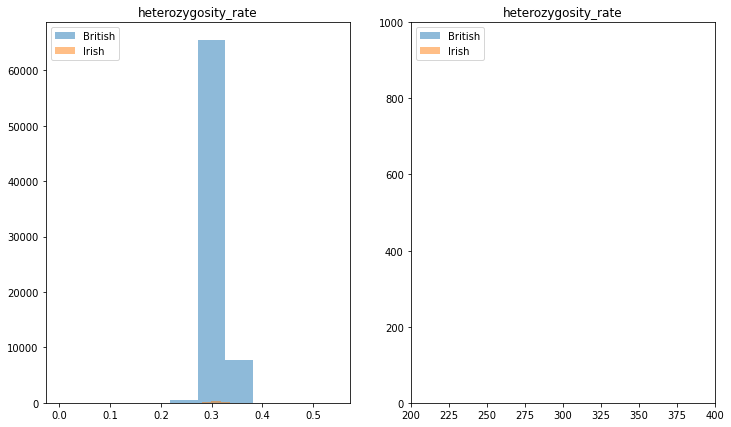

In [22]:
#British vs Irish

pop1="British"
pop2="Irish"
df1=df_british
df2=df_irish
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['heterozygosity_rate'], df2['heterozygosity_rate']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['heterozygosity_rate'], alpha=0.5, label=pop1)
ax[0].hist(df2['heterozygosity_rate'], alpha=0.5, label=pop2)
ax[0].set_title("heterozygosity_rate")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['heterozygosity_rate'], alpha=0.5, label=pop1)
ax[1].hist(df2['heterozygosity_rate'], alpha=0.5, label=pop2)
ax[1].set_title("heterozygosity_rate")
ax[1].legend(loc='upper left')

Irish ks test vs Other White
Ks_2sampResult(statistic=0.03372808404056124, pvalue=0.4484406455424781)


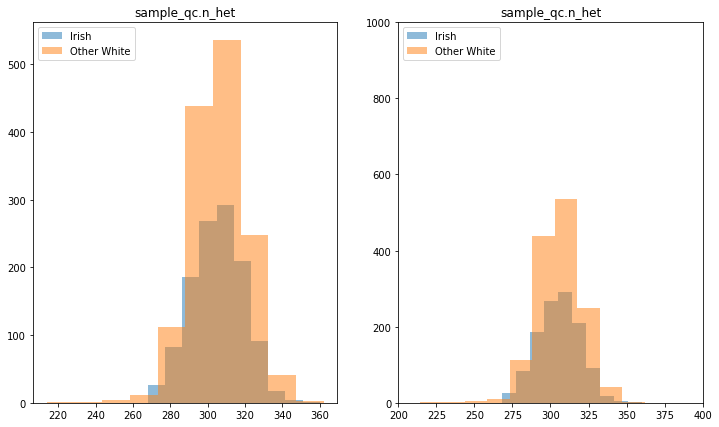

In [93]:
#Irish vs other EUR
df_other_white=df.loc[df['assigned_pop']=="Any other white background"]

pop1="Irish"
pop2="Other White"
df1=df_irish
df2=df_other_white
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

British ks test vs Other White
Ks_2sampResult(statistic=0.024421280054916783, pvalue=0.3882100799567063)


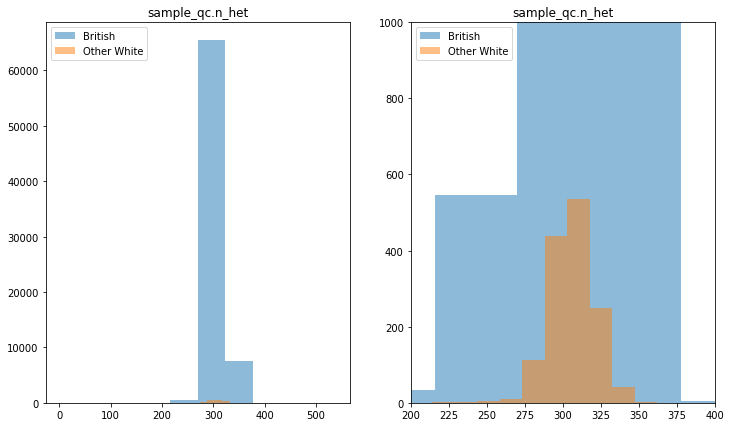

In [94]:
df_other_white=df.loc[df['assigned_pop']=="Any other white background"]

pop1="British"
pop2="Other White"
df1=df_british
df2=df_other_white
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

Caribbean ks test vs African
Ks_2sampResult(statistic=0.3329681952103951, pvalue=3.231307455543113e-25)


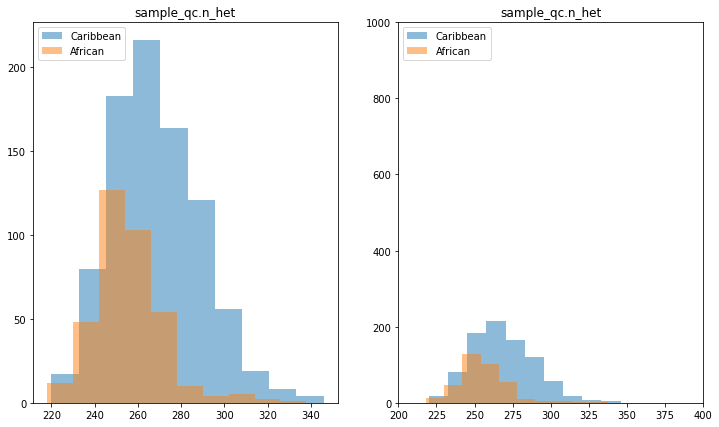

In [96]:
#Caribbean vs African

pop1="Caribbean"
pop2="African"
df1=df_caribbean
df2=df_african
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

Indian ks test vs Pakistani
Ks_2sampResult(statistic=0.33231188930472744, pvalue=8.274369489515212e-51)


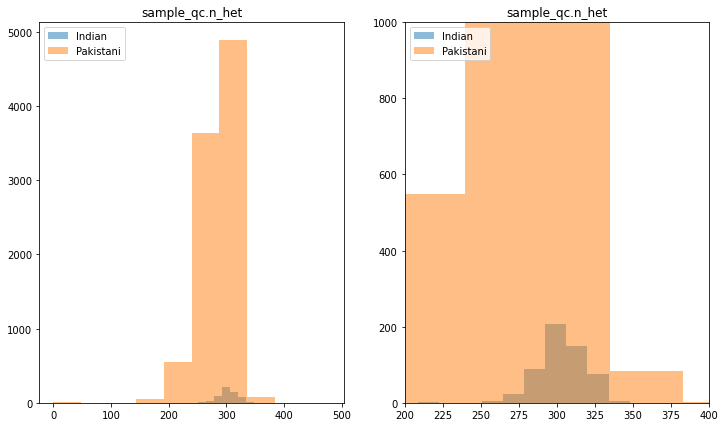

In [97]:
#Indian vs Pakistani 
pop1="Indian"
pop2="Pakistani"
df1=df_indian
df2=df_pakistani
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')


Indian ks test vs Bangladeshi
Ks_2sampResult(statistic=0.3638943669048802, pvalue=6.87000335253049e-53)


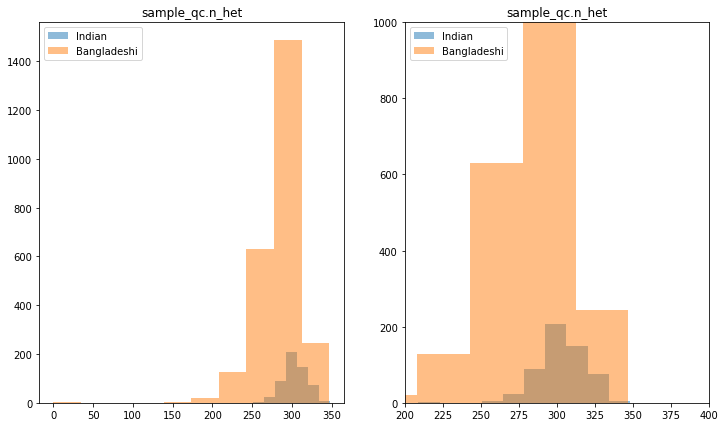

In [98]:
# Indian vs Bangladeshi
pop1="Indian"
pop2="Bangladeshi"
df1=df_indian
df2=df_bangladeshi
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

Pakistani ks test vs Bangladeshi
Ks_2sampResult(statistic=0.06488806545309875, pvalue=1.0)


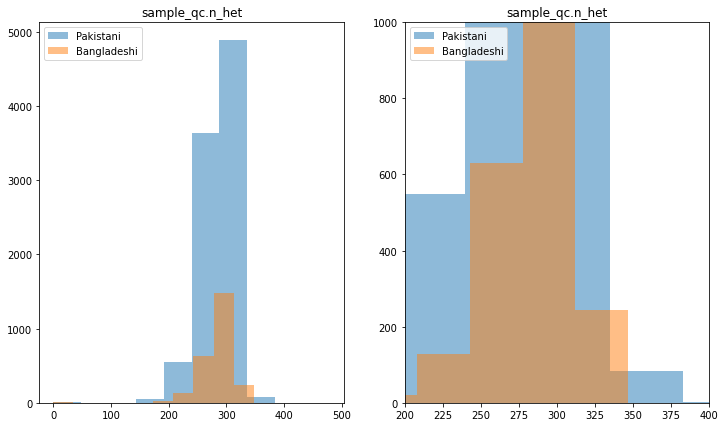

In [99]:
#Pakistani vs Bangladeshi
pop1="Pakistani"
pop2="Bangladeshi"
df1=df_pakistani
df2=df_bangladeshi
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,1000])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

In [109]:
#check Pakistani_UKBB vs Pakistani_ELGH and Bangladeshi_UKBB vs Bangladeshi_ELGH
df_pakistani_ukbb=df.loc[(df['known_pop']=="Pakistani") & (df['cohort']=="UKBB")]
df_bangladeshi_ukbb=df.loc[(df['known_pop']=="Bangladeshi") & (df['cohort']=="UKBB")]
df_elgh=df.loc[(df['cohort']=="ELGH_part1") | (df['cohort']=="ELGH_part3") | (df['cohort']=="ELGH_part4") |(df['cohort']=="ELGH_part5")]
df_pakistani_elgh=df_elgh.loc[(df_elgh['known_pop']=="Pakistani")]
df_bangladeshi_elgh=df_elgh.loc[(df_elgh['known_pop']=="Bangladeshi")]


Pakistani UKBB ks test vs Pakistani ELGH
Ks_2sampResult(statistic=0.42089371980676327, pvalue=1.2212453270876722e-15)


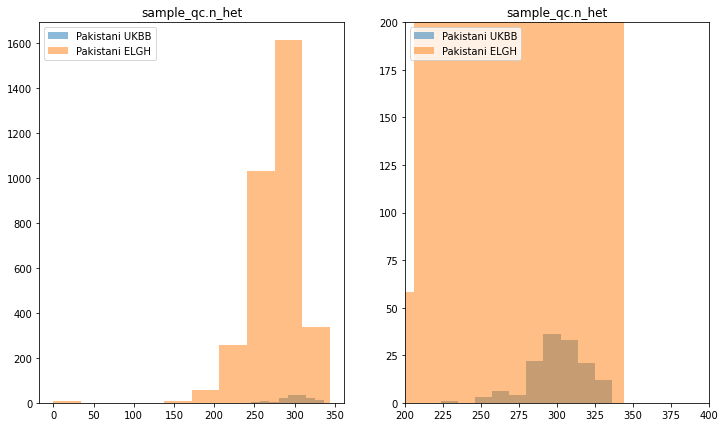

In [115]:
#Pakistani UKBB vs Pakistani ELGH
pop1="Pakistani UKBB"
pop2="Pakistani ELGH"
df1=df_pakistani_ukbb
df2=df_pakistani_elgh
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,200])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

Bangladeshi UKBB ks test vs Bangladeshi ELGH
Ks_2sampResult(statistic=0.510365929811415, pvalue=0.00013588292142285852)


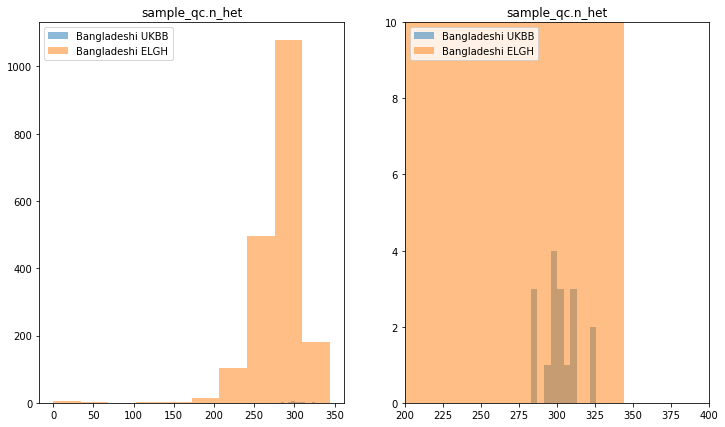

In [114]:
#Bangladeshi UKBB vs Bangladeshi ELGH
pop1="Bangladeshi UKBB"
pop2="Bangladeshi ELGH"
df1=df_bangladeshi_ukbb
df2=df_bangladeshi_elgh
print(f"{pop1} ks test vs {pop2}")
print(stats.ks_2samp(df1['sample_qc.n_het'], df2['sample_qc.n_het']))

fig, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12,7))
ax = ax.ravel() 
#ax[0].autoscale(True)

ax[0].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[0].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[0].set_title("sample_qc.n_het")
ax[0].legend(loc='upper left')

ax[1].axis([200,400,0,10])
ax[1].hist(df1['sample_qc.n_het'], alpha=0.5, label=pop1)
ax[1].hist(df2['sample_qc.n_het'], alpha=0.5, label=pop2)
ax[1].set_title("sample_qc.n_het")
ax[1].legend(loc='upper left')

In [ ]:
#

In [10]:
#
df.cohort.value_counts()

UKBB                49730
DDD                 32338
BiB_part1            2311
UK_10K_CHD           2042
ELGH_part1           1652
ELGH_part5           1468
ELGH_part3           1088
ELGH_part4           1067
Birmingham_part1     1061
BiB_part2             473
Birmingham_part2      444
Name: cohort, dtype: int64

array([<AxesSubplot:title={'center':'sample_qc.n_het'}>], dtype=object)

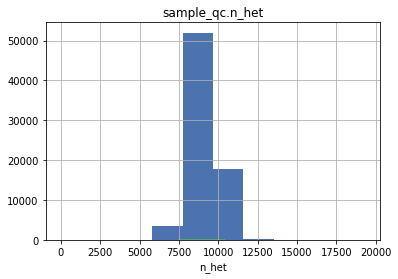

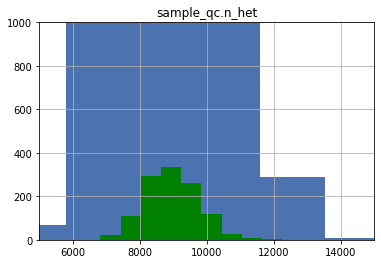

In [113]:
#stats.ks_2samp(df_british['sample_qc.n_het'], df_irish['sample_qc.n_het'])
#plt.style.use('seaborn-deep')
#df_british.plot.hist(by='sample_qc.n_het', legend='British n_het', title='British n_het')
#hist1= df_british.hist(column='sample_qc.n_het')
#hist2= df_irish.hist(column='sample_qc.n_het')
#_, bins, _ = plt.hist(df_irish['sample_qc.n_het'], bins=10)
#plt.axis([5000,15000,0,1000])
#plt.hist([df_british['sample_qc.n_het'], df_irish['sample_qc.n_het']], label=['x', 'y'])
fig = plt.figure()
df_british.columns.name = 'Type'
ax = fig.add_subplot(111)

ax.set(xlabel='n_het')
df_british.hist(column='sample_qc.n_het', ax=ax)
df_irish.hist(column='sample_qc.n_het', ax=ax)

#df_irish['sample_qc.n_het'].plot(kind='hist', ax=ax, color='red')

fig = plt.figure()

ax = fig.add_subplot(111)
ax.axis([5000,15000,0,1000])
ax.set_title("British and Irish n_het")
df_british.hist(column='sample_qc.n_het', ax=ax)
df_irish.hist(column='sample_qc.n_het', ax=ax, color="green", label="irish", xlabelsize=10)
#df_british['sample_qc.n_het'].plot.hist( label="Duf", ax=ax)
#df_irish['sample_qc.n_het'].plot(kind='hist', label="sdas", ax=ax, color='red')


